In [24]:
import gensim

import gensim.corpora as corpora
from gensim.models import LdaModel

import utils.filemanagement
from utils.filemanagement import get_project_root
from utils.filemanagement import load_from_file
from pprint import pprint
import os
from utils.config import random_sample,seed

In [25]:
from utils.filemanagement import load_from_file, write_topics_file, get_project_root

NUM_TOPICS = 30
TOPN = 20
model_type = "lda"
model_name="LDA"
data_type = "np_mini_stopwords"
passes = 1000
decay = 0.5
embedding_model = f"embedding_p{passes}_t{NUM_TOPICS}"
experiment="embedding"
file_name = f"{model_type}_{embedding_model}_{data_type}"
folder_path_data =f"preprocessed_data"

file_name_data = f"{data_type}.csv"

df = load_from_file(folder_path_data,file_name_data)
folder_path_topics = f"preprocessed_data/results/embedding/{model_type}"
folder_path_word_cloud = f"preprocessed_data/wordclouds/{experiment}/{model_type}/{file_name}"

folder_name = f"Embedding-experiment/models/{model_type}"

ROOT_PATH = get_project_root()
file_path = os.path.join(ROOT_PATH,folder_name,file_name)





In [26]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations


data = df.text.values.tolist()
new_data = []
for item in data:
    new_data.append(str(item))


data_words = list(sent_to_words(new_data))

In [27]:
import os
from gensim.models import LdaMulticore

id2word = corpora.Dictionary(data_words)
texts = data_words

corpus = [id2word.doc2bow(text) for text in texts]
folder_name = f"Embedding-experiment/models/{model_type}"
ROOT_PATH = get_project_root()
file_path = os.path.join(ROOT_PATH,folder_name,file_name)

try:
    lda = LdaMulticore.load(file_path)
except:
    lda = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=NUM_TOPICS,
                                     random_state=42,
                                     passes=passes,
                                     decay=decay,
                                      )
    LdaMulticore.save(lda, file_path)

In [28]:
lda.get_topics()

array([[7.53604516e-04, 1.38339760e-06, 1.38339760e-06, ...,
        1.38339760e-06, 1.38339760e-06, 1.38339760e-06],
       [1.11625646e-03, 5.85495445e-06, 5.85495445e-06, ...,
        1.81230906e-04, 1.81230906e-04, 1.81230906e-04],
       [1.13720025e-05, 5.57828986e-04, 1.13720025e-05, ...,
        1.13720025e-05, 1.13720025e-05, 1.13720025e-05],
       ...,
       [4.68716235e-06, 1.61215416e-04, 4.68716235e-06, ...,
        4.68716235e-06, 4.68716235e-06, 4.68716235e-06],
       [7.15421947e-06, 8.25720144e-06, 7.15421947e-06, ...,
        7.15421947e-06, 7.15421947e-06, 7.15421947e-06],
       [6.14474004e-04, 4.94414235e-06, 4.94414235e-06, ...,
        4.94414235e-06, 4.94414235e-06, 4.94414235e-06]], dtype=float32)

array([[7.53604516e-04, 1.38339760e-06, 1.38339760e-06, ...,
        1.38339760e-06, 1.38339760e-06, 1.38339760e-06],
       [1.11625646e-03, 5.85495445e-06, 5.85495445e-06, ...,
        1.81230906e-04, 1.81230906e-04, 1.81230906e-04],
       [1.13720025e-05, 5.57828986e-04, 1.13720025e-05, ...,
        1.13720025e-05, 1.13720025e-05, 1.13720025e-05],
       ...,
       [4.68716235e-06, 1.61215416e-04, 4.68716235e-06, ...,
        4.68716235e-06, 4.68716235e-06, 4.68716235e-06],
       [7.15421947e-06, 8.25720144e-06, 7.15421947e-06, ...,
        7.15421947e-06, 7.15421947e-06, 7.15421947e-06],
       [6.14474004e-04, 4.94414235e-06, 4.94414235e-06, ...,
        4.94414235e-06, 4.94414235e-06, 4.94414235e-06]], dtype=float32)

In [29]:
lda.get_topic_terms(0,5)

[(578, 0.014688705),
 (566, 0.013779719),
 (1157, 0.013265106),
 (124, 0.010302427),
 (107, 0.0073821517)]

[(578, 0.014688705),
 (566, 0.013779719),
 (1157, 0.013265106),
 (124, 0.010302427),
 (107, 0.0073821517)]

In [30]:
topic_words = [[] for i in range(NUM_TOPICS)]

for i in range(NUM_TOPICS):
    r = lda.get_topic_terms(i,TOPN)
    for item in r:
        topic_words[i].append(id2word[item[0]])

In [31]:
from utils.filemanagement import write_topics_file

topic_words_numbered = [(i, topic_words[i]) for i in range(NUM_TOPICS)]

write_topics_file(folder_path_topics, file_name, topic_words_numbered)

In [32]:

# Print the Keyword in the 10 topics
pprint(lda.print_topics())
doc_lda = lda[corpus]

[(21,
  '0.014*"statsraden" + 0.008*"høyre" + 0.008*"arbeidslivet" + '
  '0.006*"spørsmal" + 0.005*"sv" + 0.004*"forslag" + 0.004*"arbeid" + '
  '0.003*"forhold" + 0.003*"bedre" + 0.003*"ønsker"'),
 (27,
  '0.036*"folkeparti" + 0.035*"kristelig" + 0.005*"statsraden" + '
  '0.005*"folkepartis" + 0.004*"biler" + 0.004*"venstre" + 0.003*"salg" + '
  '0.003*"sv" + 0.003*"offentlig" + 0.002*"bil"'),
 (16,
  '0.013*"statsraden" + 0.007*"mattilsynet" + 0.005*"vaksne" + 0.004*"svaret" '
  '+ 0.003*"kompetanse" + 0.003*"tilsyn" + 0.003*"spørsmal" + 0.003*"takker" + '
  '0.002*"rein" + 0.002*"km"'),
 (7,
  '0.012*"forskning" + 0.010*"utdanning" + 0.006*"gjelder" + 0.006*"norge" + '
  '0.006*"studenter" + 0.005*"høyere" + 0.004*"universiteter" + '
  '0.004*"institusjonene" + 0.004*"komiteen" + 0.003*"atomvapen"'),
 (11,
  '0.027*"statsraden" + 0.007*"stortinget" + 0.007*"spørsmal" + 0.006*"saken" '
  '+ 0.005*"ønsker" + 0.004*"statens" + 0.004*"etiopia" + 0.004*"gjelder" + '
  '0.003*"følgende" +

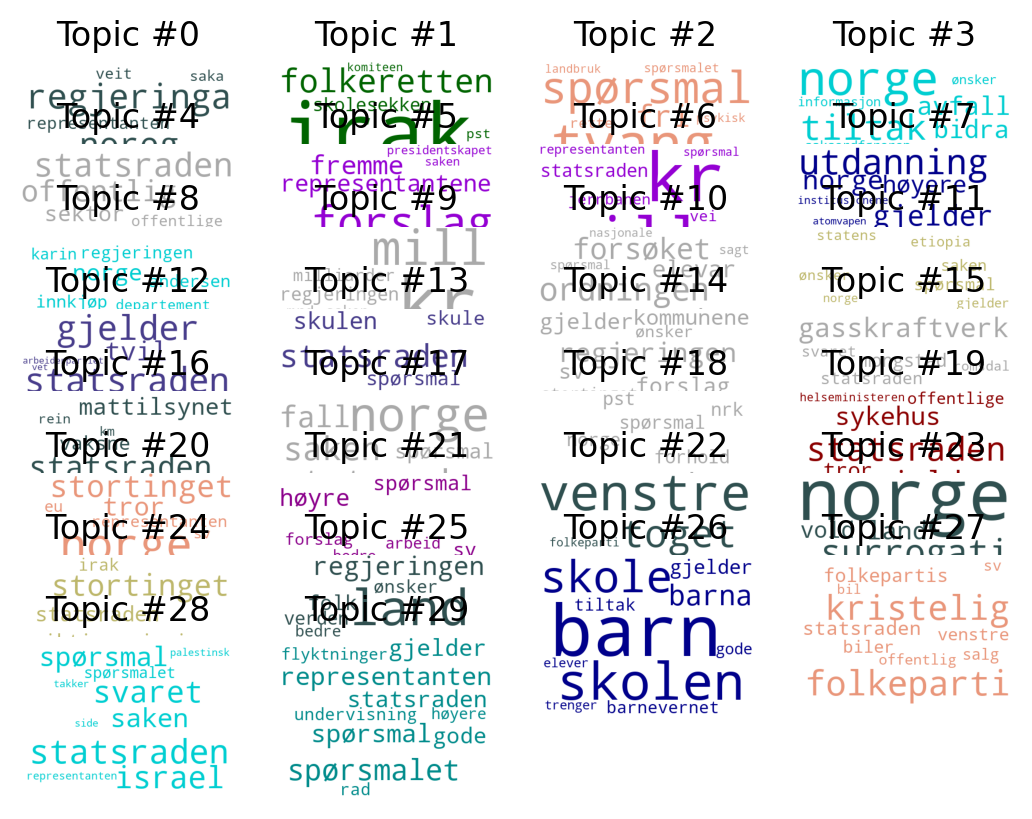

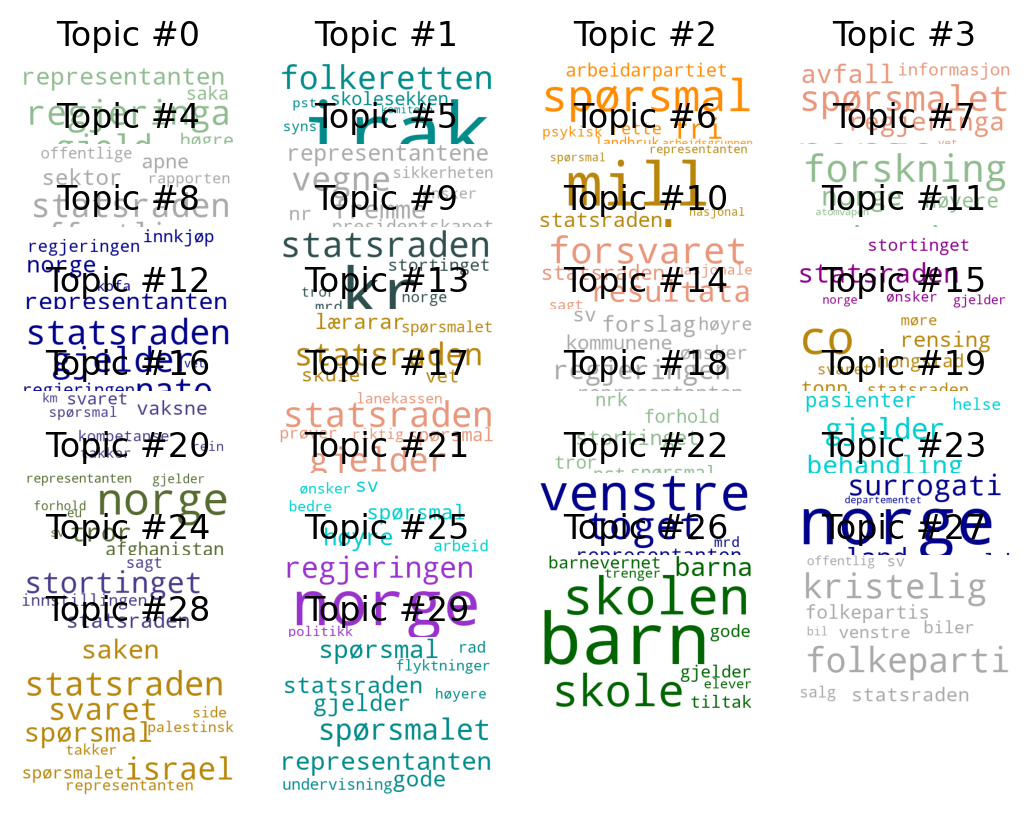

In [33]:
from utils.tables_and_plots import display_n_wordclouds

wordcloud = display_n_wordclouds([dict(lda.show_topic(i)) for i in range(NUM_TOPICS)], f"{model_name}: {data_type}", NUM_TOPICS, dpi=200)

In [34]:
formatted_topics = [dict(lda.show_topic(i)) for i in range(NUM_TOPICS)]
print(formatted_topics)

[{'regjeringa': 0.014688705, 'noreg': 0.013779719, 'gjeld': 0.013265106, 'sv': 0.010302427, 'representanten': 0.0073821517, 'trur': 0.0065567624, 'seie': 0.0063565634, 'veit': 0.006101846, 'høgre': 0.0055622673, 'saka': 0.00551656}, {'irak': 0.007034006, 'usa': 0.005845536, 'folkeretten': 0.004994503, 'kulturelle': 0.0047419327, 'skolesekken': 0.004221163, 'gjelder': 0.0039209304, 'forhold': 0.0036616656, 'syns': 0.0036484075, 'pst': 0.0034210072, 'komiteen': 0.0033497522}, {'tvang': 0.006069169, 'spørsmal': 0.004719905, 'konkurranse': 0.0034707675, 'fri': 0.003434333, 'arbeidarpartiet': 0.0032855885, 'rette': 0.0027966136, 'spørsmalet': 0.0027933537, 'psykisk': 0.0026320077, 'landbruk': 0.0024514594, 'arbeidsgruppen': 0.002393391}, {'norge': 0.0037771962, 'spørsmalet': 0.00336152, 'tiltak': 0.003357189, 'regjeringa': 0.0028540902, 'avfall': 0.0028108147, 'bidra': 0.002659368, 'informasjon': 0.0026373814, 'ønsker': 0.0026209997, 'saksordføreren': 0.0025784853, 'vet': 0.0025530416}, {'s

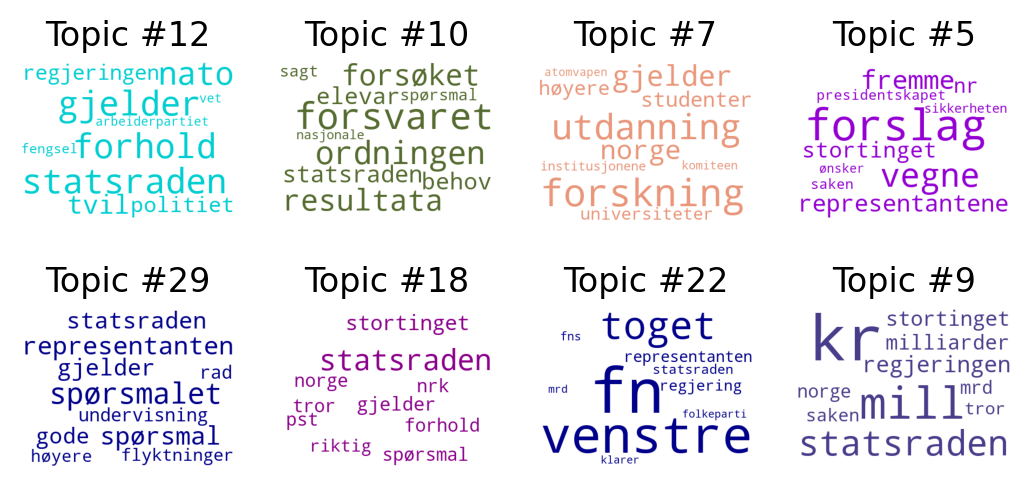

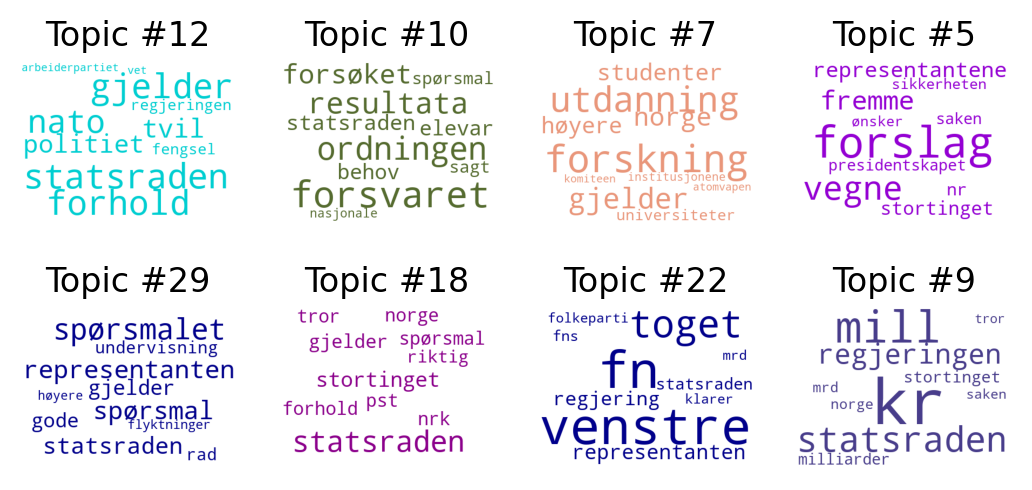

In [35]:
from utils.filemanagement import make_excerpt_wordcloud


excerpt_wordcloud = make_excerpt_wordcloud(formatted_topics,NUM_TOPICS,f"Sample from {model_name}-{embedding_model}: {data_type}",random_sample=random_sample,seed=seed)

excerpt_wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud_sample"),bbox_inches="tight")

In [36]:
from utils.tables_and_plots import create_wordcloud

file_name_model = "wordcloud"
print(file_name)

for i in range(NUM_TOPICS):
    topic_wordcloud = create_wordcloud(dict(lda.show_topic(i)))
    full_wordcloud_folder_path = os.path.join(ROOT_PATH, folder_path_word_cloud)
    #full_wordcloud_file_path = os.path.join(ROOT_PATH, folder_path_word_cloud, str(file_name_model + f"_{i}.png"))
    if not os.path.exists(full_wordcloud_folder_path):
        os.mkdir(full_wordcloud_folder_path)
    topic_wordcloud.to_file(os.path.join(ROOT_PATH, folder_path_word_cloud, str(file_name_model + f"_{i}.png")))

wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud"))

lda_embedding_p1000_t30_np_mini_stopwords
lda_embedding_p1000_t30_np_mini_stopwords


In [37]:
lda.show_topic(1)

[('irak', 0.007034006),
 ('usa', 0.005845536),
 ('folkeretten', 0.004994503),
 ('kulturelle', 0.0047419327),
 ('skolesekken', 0.004221163),
 ('gjelder', 0.0039209304),
 ('forhold', 0.0036616656),
 ('syns', 0.0036484075),
 ('pst', 0.0034210072),
 ('komiteen', 0.0033497522)]

[('irak', 0.007034006),
 ('usa', 0.005845536),
 ('folkeretten', 0.004994503),
 ('kulturelle', 0.0047419327),
 ('skolesekken', 0.004221163),
 ('gjelder', 0.0039209304),
 ('forhold', 0.0036616656),
 ('syns', 0.0036484075),
 ('pst', 0.0034210072),
 ('komiteen', 0.0033497522)]

In [38]:
# Save topic words of model to file

topics = lda.show_topics(num_topics = NUM_TOPICS,num_words=20, formatted=False)
topic_words = []
for i in range(len(topics)):
    topic_word_list = []
    for j in range(len(topics[i][1])):
        topic_word_list.append(topics[i][1][j][0])
    topic_words.append((i, topic_word_list))


write_topics_file(folder_path_topics, file_name, topic_words)

In [39]:
from utils.filemanagement import load_model_topics

loaded_topics = load_model_topics(folder_path_topics, file_name)

folder_path_frequencies = r"preprocessed_data/stats"
file_name_co_frequencies = f"{data_type}_co_freq"
file_name_frequencies=f"{data_type}_freq"

In [40]:
from utils.filemanagement import load_word_frequencies

word_frequencies = load_word_frequencies(folder_path_frequencies, file_name_frequencies)

In [41]:
from utils.filemanagement import load_zipped_word_co_frequencies

word_co_frequencies = load_zipped_word_co_frequencies(folder_path_frequencies,file_name_co_frequencies)

In [42]:
from utils.stats import compute_metrics

coherence, diversity = compute_metrics(
    loaded_topics.values(), word_frequencies, word_co_frequencies, 10)

10
('noreg', 'regjeringa') wordtuple
('noreg', 'regjeringa') wordup
425.0 over
174632.0 under
-8.682639389614163 -8.731319031025064 0.994424709343694 ('noreg', 'regjeringa') 425 526 332
('gjeld', 'regjeringa') wordtuple
('gjeld', 'regjeringa') wordup
313.0 over
175158.0 under
-9.128278509430945 -8.290018846932618 1.1011167378477662 ('gjeld', 'regjeringa') 313 526 333
('regjeringa', 'sv') wordtuple
('regjeringa', 'sv') wordup
871.0 over
705892.0 under
-9.66255903689362 -9.766528908598865 0.9893544704901549 ('regjeringa', 'sv') 871 526 1342
('regjeringa', 'representanten') wordtuple
('regjeringa', 'representanten') wordup
285.0 over
853698.0 under
-11.548548164788171 -8.154818109052105 1.416162569214011 ('regjeringa', 'representanten') 285 526 1623
('regjeringa', 'trur') wordtuple
('regjeringa', 'trur') wordup
174.0 over
84160.0 under
-8.917903588330937 -7.442943495848729 1.1981689224572054 ('regjeringa', 'trur') 174 526 160
('regjeringa', 'seie') wordtuple
('regjeringa', 'seie') wordup


In [43]:
from nltk import word_tokenize
from utils.config import use_pmi
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
if not use_pmi:
    corpus_tokenized = []
    for item in new_data:
        word_tokens = word_tokenize(item)
        corpus_tokenized.append(word_tokens)

    dct = Dictionary(corpus_tokenized)
    inp = list(loaded_topics.values())


    cm = CoherenceModel(topics=inp, texts = corpus_tokenized, dictionary=dct, coherence='c_npmi')
    coherence2 = cm.get_coherence()  # get coherence value
    print(coherence2)

-0.10693196348373206
-0.10693196348373206


In [44]:
print(diversity)
print(coherence)

0.58
0.9774213147300397
0.58
0.9774213147300397


In [45]:
# Check the stats for the dataset after running basic pipeline
from tabulate import tabulate
import csv
models = [file_name for i in range(0, 2)]
metrics = ["coherence" if i < 1 else "diversity" for i in range(0, 2)]
values = [
    coherence,
    diversity
    ]

stats = [models, metrics, values]
stats_tabulate = list(zip(*stats))
print(tabulate(stats_tabulate, headers=["Model", "Metric", "Value"], tablefmt="fancy_grid"))

╒═══════════════════════════════════════════╤═══════════╤══════════╕
│ Model                                     │ Metric    │    Value │
╞═══════════════════════════════════════════╪═══════════╪══════════╡
│ lda_embedding_p1000_t30_np_mini_stopwords │ coherence │ 0.977421 │
├───────────────────────────────────────────┼───────────┼──────────┤
│ lda_embedding_p1000_t30_np_mini_stopwords │ diversity │ 0.58     │
╘═══════════════════════════════════════════╧═══════════╧══════════╛
╒═══════════════════════════════════════════╤═══════════╤══════════╕
│ Model                                     │ Metric    │    Value │
╞═══════════════════════════════════════════╪═══════════╪══════════╡
│ lda_embedding_p1000_t30_np_mini_stopwords │ coherence │ 0.977421 │
├───────────────────────────────────────────┼───────────┼──────────┤
│ lda_embedding_p1000_t30_np_mini_stopwords │ diversity │ 0.58     │
╘═══════════════════════════════════════════╧═══════════╧══════════╛


In [46]:
# Save all topic stats to file

topic_stats_folder_path = f"preprocessed_data/metrics/{experiment}/{model_type}"
topic_stats_file_name = f"{file_name}_stats"
topic_stats_path = os.path.join(ROOT_PATH,topic_stats_folder_path, topic_stats_file_name + r".csv")

TOPIC_STAT = "Topic stat"
VALUE = "Value"

with open(topic_stats_path, encoding="utf-8", mode="w", newline="") as topic_stats_file:
    header = [TOPIC_STAT, VALUE]
    writer = csv.DictWriter(topic_stats_file, fieldnames=header, delimiter=";")
    writer.writeheader()
    writer.writerow({TOPIC_STAT : "Coherence", VALUE : coherence})
    writer.writerow({TOPIC_STAT : "Diversity", VALUE : diversity})